## Analyzing Customer Churn in Telecom Industry
By Karan Singh

### Outline
- Motivation
- Data
- Data Inspection and Treatment
- Exploratory Data Analysis
- Clsutering for feature engineering
- Machine Learning : Classification
- Feature Engineering/Selection
- Modeling Results
- Model Interpretation & Use

### Motivation/Objective
- Customer Churn refers to the rate of customer attrition in a company or the speed at which customer leaves your company or service.
- Churn modeling is an important data science use case across many industries (especially subscription based businesses) 
- Model churn and apply to a business situation in the telecom industry
- Learn how to perform clustering and classification
- Identify churn rates by important drivers of Churn

#### Business Case:
- Reducing customer churn by identifying potential churn candidates beforehand, and take proactive actions to make them stay.


### Data
- Obtained from Kaggle: Telco Customer Churn
- 7043 entries, 21 columns (18 categorical , 3 numeric )
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment  method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents




In [3]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import pandas_profiling 

In [4]:
# importing packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Telco_customer_Churn.csv')

In [4]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Data Conversions

In [50]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.65      8
          ..
452.55     1
2198.9     1
661.25     1
4378.8     1
713.6      1
Name: TotalCharges, Length: 6531, dtype: int64

In [60]:
data[data['TotalCharges']==' ']

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [ ]:
#TotalCharges are obtained by multiplying tenure with MonthlyCharges. Where tenure is 0, TotalCharges are 0 as well.
#So we replace missing values by 0

In [5]:
data['TotalCharges'].replace(to_replace=' ', value='0',inplace=True)

In [6]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

### Data Inspection & EDA

In [6]:
# Export pandas profiling output to html file
output = pandas_profiling.ProfileReport(data)
output.to_file('pandas_profiling.html')

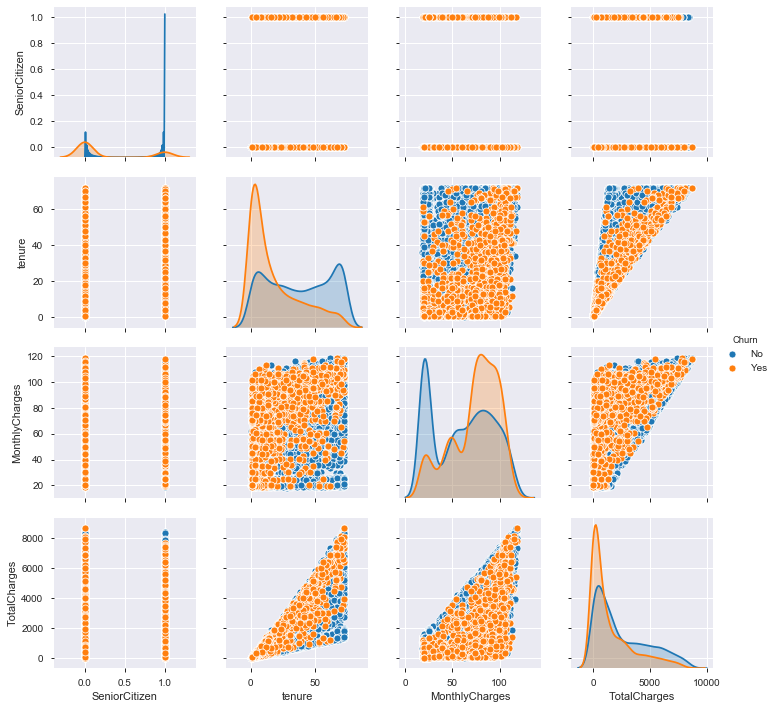

In [57]:
sns.pairplot(data,hue='Churn')

### Studying relationships of Churn with other categorical variables

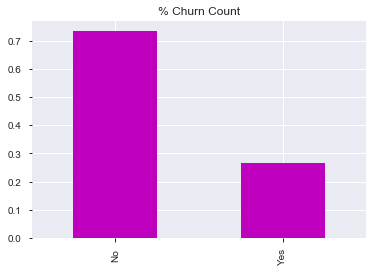

In [66]:
data['Churn'].value_counts(normalize=True).plot(kind='bar',color='m').set(title='% Churn Count');

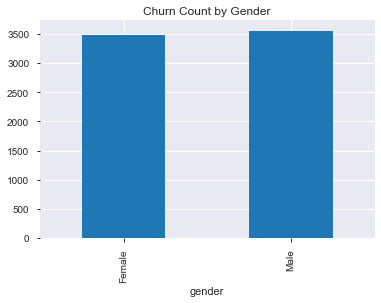

In [68]:
#Effect of Gender on Churn
data.groupby('gender')['Churn'].count().plot(kind='bar').set(title='Churn Count by Gender');

In [ ]:
#Insight: Gender seems like a non predictor

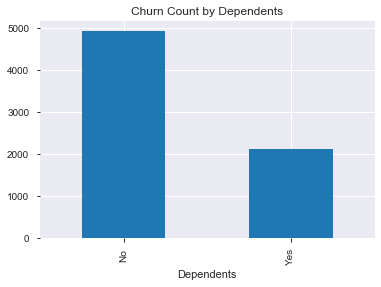

In [69]:
#Effect of dependents on Churn
data.groupby('Dependents')['Churn'].count().plot(kind='bar').set(title='Churn Count by Dependents');

In [ ]:
#Dependents seems to be a significant predictor

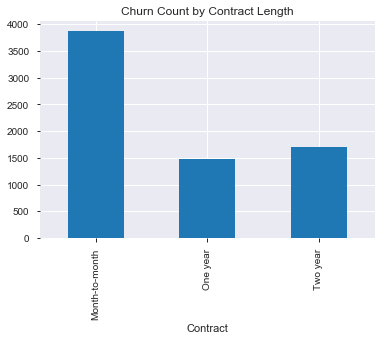

In [70]:
data.groupby('Contract')['Churn'].count().plot(kind='bar').set(title='Churn Count by Contract Length');

In [ ]:
# We can see that customers with month-to-month contract are much more likely to churn 

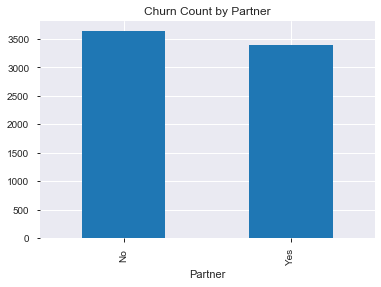

In [71]:
data.groupby('Partner')['Churn'].count().plot(kind='bar').set(title='Churn Count by Partner');

In [ ]:
#No significant relationship between Partner and Churn

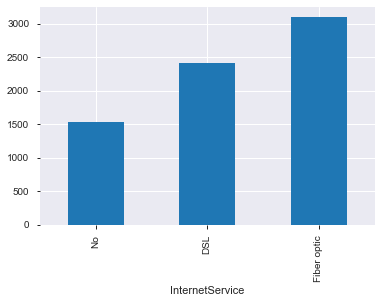

In [142]:
data.groupby('InternetService')['Churn'].count().sort_values().plot(kind='bar')

In [ ]:
# Customers with fiber optic internet service are more likely to churn

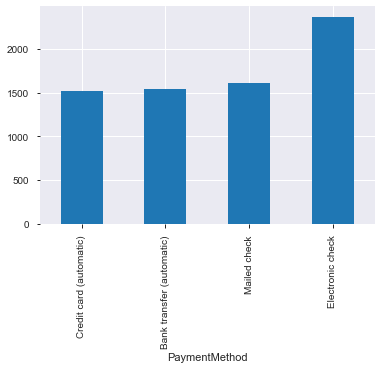

In [143]:
data.groupby('PaymentMethod')['Churn'].count().sort_values().plot(kind='bar')

In [ ]:
#Customers paying by electronic cheque are more likely to churn

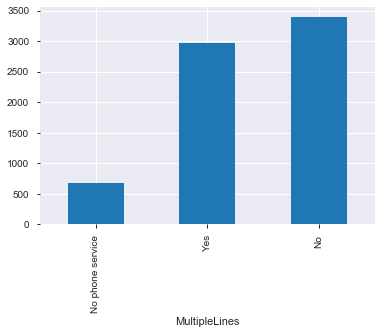

In [144]:
data.groupby('MultipleLines')['Churn'].count().sort_values().plot(kind='bar')

In [ ]:
#Customers with no phone service are less likely to churn

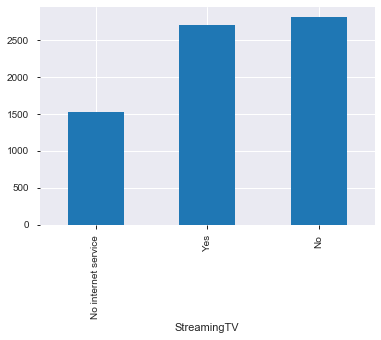

In [146]:
data.groupby('StreamingTV')['Churn'].count().sort_values().plot(kind='bar')

In [ ]:
#Streaming TV is non predictor

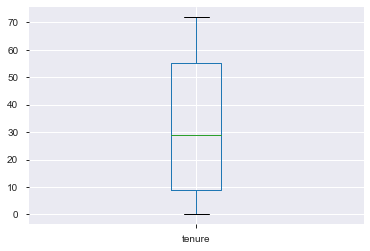

In [144]:
data['tenure'].plot(kind='box')

In [75]:
tenure_binned = pd.cut(data['tenure'],bins = [0,20,40,60,80],labels=['Less than 20','20-40','40-60','60-80'])

In [76]:
tenure_binned

0       Less than 20
1              20-40
2       Less than 20
3              40-60
4       Less than 20
            ...     
7038           20-40
7039           60-80
7040    Less than 20
7041    Less than 20
7042           60-80
Name: tenure, Length: 7043, dtype: category
Categories (4, object): [Less than 20 < 20-40 < 40-60 < 60-80]

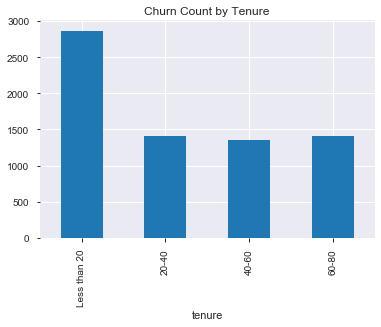

In [77]:
pd.concat([tenure_binned,data['Churn']],axis=1).groupby('tenure')['Churn'].count().plot(kind='bar').set(title='Churn Count by Tenure');

In [ ]:
#Important Insight
#Customers with tenure less than 20 are much more likely to churn compared to those with greater than 
#20 months

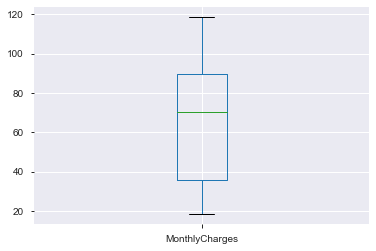

In [157]:
data['MonthlyCharges'].plot(kind='box')

In [162]:
data['MonthlyCharges'].min()

18.25

In [73]:
monthly_charges_binned = pd.cut(data['MonthlyCharges'],bins=[0,30,60,90,120],labels=['Less than 30','30-60','60-90','More than 90'])
monthly_charges_binned

0       Less than 30
1              30-60
2              30-60
3              30-60
4              60-90
            ...     
7038           60-90
7039    More than 90
7040    Less than 30
7041           60-90
7042    More than 90
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (4, object): [Less than 30 < 30-60 < 60-90 < More than 90]

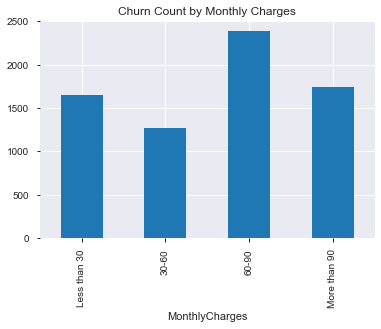

In [74]:
pd.concat([monthly_charges_binned,data['Churn']],axis=1).groupby('MonthlyCharges')['Churn'].count().plot(kind='bar').set(title='Churn Count by Monthly Charges');

In [ ]:
#Insight: Customers in 60-90 bracket are most likely to churn. 

In [108]:
data['customerID'].nunique()

7043

In [ ]:
#Implies all records are unique

### Division into Categorical and Numeric Variables

In [107]:
data_num = data.select_dtypes(['int64','float64'])
data_cat = data.select_dtypes(['object'])

In [9]:
data_num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [95]:
data_cat.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [72]:
data_num.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [96]:
data_cat.describe()

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     4283-IVYCI   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7043              7043  7043  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4171              2365  5174

In [15]:
data_cat_2 = data_cat[['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']]
data_cat_3 = data_cat[['customerID','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                      'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]

In [18]:
data_cat_2_dummies = pd.get_dummies(data_cat_2,drop_first= True)
data_cat_3_dummies = pd.get_dummies(data_cat_3.drop(columns='customerID'))

In [21]:
data_cat_3_dummies.head()

MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                 0                               1                  0   
1                 1                               0                  0   
2                 1                               0                  0   
3                 0                               1                  0   
4                 1                               0                  0   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                  1                                   0                   0   
1                  0                                   0                   1   
2                  0                                   0                   1   
3                  0                                   0                   1   
4                  1                                   0                   0   

   OnlineBackup_No  ...  StreamingMovies_No  \
0                0  ...                   1   
1                1  ...                   1   
2                0  ...                   1   
3                1  ...                   1   
4                1  ...                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

In [22]:
data_final = pd.concat([data_num,data_cat_2_dummies,data_cat_3_dummies],axis=1)

In [23]:
data_final.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85            0   
1              0      34           56.95       1889.50            1   
2              0       2           53.85        108.15            1   
3              0      45           42.30       1840.75            1   
4              0       2           70.70        151.65            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  PaperlessBilling_Yes  \
0            1               0                 0                     1   
1            0               0                 1                     0   
2            0               0                 1                     1   
3            0               0                 0                     0   
4            0               0                 1                     1   

   Churn_Yes  ...  StreamingMovies_No  StreamingMovies_No internet service  \
0          0  ...                   1                                    0   
1          0  ...                   1                                    0   
2          1  ...                   1                                    0   
3          0  ...                   1                                    0   
4          1  ...                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 41 columns]

In [25]:
data_final['customerID'] = data_cat_3['customerID']

In [29]:
data_final_cust = data_final.set_index('customerID')

In [30]:
data_final_cust.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
customerID                                                                     
7590-VHVEG              0       1           29.85         29.85            0   
5575-GNVDE              0      34           56.95       1889.50            1   
3668-QPYBK              0       2           53.85        108.15            1   
7795-CFOCW              0      45           42.30       1840.75            1   
9237-HQITU              0       2           70.70        151.65            0   

            Partner_Yes  Dependents_Yes  PhoneService_Yes  \
customerID                                                  
7590-VHVEG            1               0                 0   
5575-GNVDE            0               0                 1   
3668-QPYBK            0               0                 1   
7795-CFOCW            0               0                 0   
9237-HQITU            0               0                 1   

            PaperlessBilling_Yes  Churn_Yes  ...  StreamingMovies_No  \
customerID                                   ...                       
7590-VHVEG                     1          0  ...                   1   
5575-GNVDE                     0          0  ...                   1   
3668-QPYBK                     1          1  ...                   1   
7795-CFOCW                     0          0  ...                   1   
9237-HQITU                     1          1  ...                   1   

            StreamingMovies_No internet service  StreamingMovies_Yes  \
customerID                                                             
7590-VHVEG                                    0                    0   
5575-GNVDE                                    0                    0   
3668-QPYBK                                    0                    0   
7795-CFOCW                                    0                    0   
9237-HQITU                                    0                    0   

            Contract_Month-to-month  Contract_One year  Contract_Two year  \
customerID                                                                  
7590-VHVEG                        1                  0                  0   
5575-GNVDE                        0                  1                  0   
3668-QPYBK                        1                  0                  0   
7795-CFOCW                        0                  1                  0   
9237-HQITU                        1                  0                  0   

            PaymentMethod_Bank transfer (automatic)  \
customerID                                            
7590-VHVEG                                        0   
5575-GNVDE                                        0   
3668-QPYBK                                        0   
7795-CFOCW                                        1   
9237-HQITU                                        0   

            PaymentMethod_Credit card (automatic)  \
customerID                                          
7590-VHVEG                                      0   
5575-GNVDE                                      0   
3668-QPYBK                                      0   
7795-CFOCW                                      0   
9237-HQITU                                      0   

            PaymentMethod_Electronic check  PaymentMethod_Mailed check  
customerID                                                              
7590-VHVEG                               1                           0  
5575-GNVDE                               0                           1  
3668-QPYBK                               0                           1  
7795-CFOCW                               0                           0  
9237-HQITU                               1                           0  

[5 rows x 41 columns]

### Outlier Treatment

In [31]:
def outlier_treatment(x):
    q1,q3 = x.quantile([0.25,0.75])
    iqr = q3-q1
    upper_lim = q3+1.5*iqr
    lower_lim = q1-1.5*iqr
    x = x.clip(lower_lim,upper_lim)
    return x

In [32]:
data_final_cust = data_final_cust.apply(outlier_treatment)

In [33]:
data_final_cust.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges  gender_Male  \
count         7043.0  7043.000000     7043.000000   7043.000000  7043.000000   
mean             0.0    32.371149       64.761692   2279.734304     0.504756   
std              0.0    24.559481       30.090047   2266.794470     0.500013   
min              0.0     0.000000       18.250000      0.000000     0.000000   
25%              0.0     9.000000       35.500000    398.550000     0.000000   
50%              0.0    29.000000       70.350000   1394.550000     1.000000   
75%              0.0    55.000000       89.850000   3786.600000     1.000000   
max              0.0    72.000000      118.750000   8684.800000     1.000000   

       Partner_Yes  Dependents_Yes  PhoneService_Yes  PaperlessBilling_Yes  \
count  7043.000000     7043.000000            7043.0           7043.000000   
mean      0.483033        0.299588               1.0              0.592219   
std       0.499748        0.458110               0.0              0.491457   
min       0.000000        0.000000               1.0              0.000000   
25%       0.000000        0.000000               1.0              0.000000   
50%       0.000000        0.000000               1.0              1.000000   
75%       1.000000        1.000000               1.0              1.000000   
max       1.000000        1.000000               1.0              1.000000   

         Churn_Yes  ...  StreamingMovies_No  \
count  7043.000000  ...         7043.000000   
mean      0.265370  ...            0.395428   
std       0.441561  ...            0.488977   
min       0.000000  ...            0.000000   
25%       0.000000  ...            0.000000   
50%       0.000000  ...            0.000000   
75%       1.000000  ...            1.000000   
max       1.000000  ...            1.000000   

       StreamingMovies_No internet service  StreamingMovies_Yes  \
count                               7043.0          7043.000000   
mean                                   0.0             0.387903   
std                                    0.0             0.487307   
min                                    0.0             0.000000   
25%                                    0.0             0.000000   
50%                                    0.0             0.000000   
75%                                    0.0             1.000000   
max                                    0.0             1.000000   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
count              7043.000000             7043.0             7043.0   
mean                  0.550192                0.0                0.0   
std                   0.497510                0.0                0.0   
min                   0.000000                0.0                0.0   
25%                   0.000000                0.0                0.0   
50%                   1.000000                0.0                0.0   
75%                   1.000000                0.0                0.0   
max                   1.000000                0.0                0.0   

       PaymentMethod_Bank transfer (automatic)  \
count                                   7043.0   
mean                                       0.0   
std                                        0.0   
min                                        0.0   
25%                                        0.0   
50%                                        0.0   
75%                                        0.0   
max                                        0.0   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                                 7043.0                     7043.000000   
mean                                     0.0                        0.335794   
std                                      0.0                        0.472301   
min                                      0.0                        0.000000   
25%                                      0.0           

In [36]:
data_final_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 41 columns):
SeniorCitizen                              7043 non-null int64
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null float64
gender_Male                                7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_Yes                           7043 non-null int64
PaperlessBilling_Yes                       7043 non-null uint8
Churn_Yes                                  7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null int64
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uin

In [34]:
data_final_cust.to_csv('final_cust')

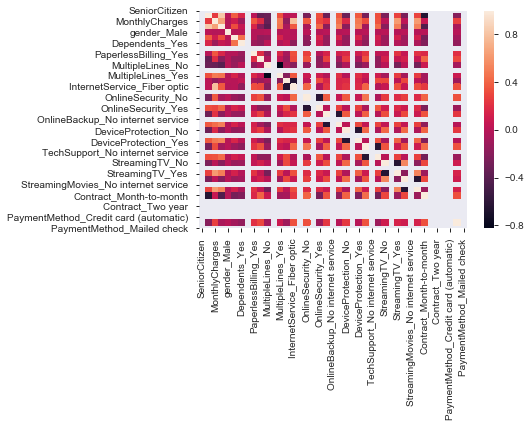

In [35]:
# visualize correlation matrix in Seaborn using a heatmap
corr = data_final_cust.corr()
sns.heatmap(corr)
plt.show()

In [37]:
corr['Churn_Yes'].sort_values(ascending=False)

Churn_Yes                                  1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
gender_Male                               -0.008612
MultipleLines_No                          -0.032569
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
InternetServ

In [38]:
#Thus, factors predicting Churn with high (positive and negative) correlations are Contract month-to-month,
#OnlineSecurity_No , Techsupport_No, InternetService_Fiber optic , PaymentMethod_Electronic check,tenure & total charges

### Part 1: Clustering Analysis
Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or dissimilarity measure (such as the Euclidean distance)

### Standardizing the Data

In [3]:
data_final_cust = pd.read_csv('final_cust')

In [82]:
data_final_cust.head(2)

customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0       1           29.85         29.85   
1  5575-GNVDE              0      34           56.95       1889.50   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 1   
1            1            0               0                 1   

   PaperlessBilling_Yes  ...  StreamingMovies_No  \
0                     1  ...                   1   
1                     0  ...                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   

   PaymentMethod_Mailed check  
0                           0  
1                           0  

[2 rows x 42 columns]

In [4]:
X = data_final_cust.drop(columns='Churn_Yes')
y = data_final_cust['Churn_Yes']

In [5]:
X.set_index('customerID',inplace=True)

In [6]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [7]:
telco_scaled = pd.DataFrame(X_scaled)
telco_scaled.head()

0         1         2         3         4         5         6    7   \
0  0.0 -1.277445 -1.160323 -0.992611 -1.009559  1.034530 -0.654012  0.0   
1  0.0  0.066327 -0.259629 -0.172165  0.990532 -0.966622 -0.654012  0.0   
2  0.0 -1.236724 -0.362660 -0.958066  0.990532 -0.966622 -0.654012  0.0   
3  0.0  0.514251 -0.746535 -0.193672  0.990532 -0.966622 -0.654012  0.0   
4  0.0 -1.236724  0.197365 -0.938874 -1.009559 -0.966622 -0.654012  0.0   

         8         9   ...        30   31       32        33   34   35   36  \
0  0.829798 -0.963330  ...  1.236489  0.0 -0.79607  0.904184  0.0  0.0  0.0   
1 -1.205113  1.038066  ...  1.236489  0.0 -0.79607 -1.105970  0.0  0.0  0.0   
2  0.829798  1.038066  ...  1.236489  0.0 -0.79607  0.904184  0.0  0.0  0.0   
3 -1.205113 -0.963330  ...  1.236489  0.0 -0.79607 -1.105970  0.0  0.0  0.0   
4  0.829798  1.038066  ...  1.236489  0.0 -0.79607  0.904184  0.0  0.0  0.0   

    37        38   39  
0  0.0  1.406418  0.0  
1  0.0 -0.711026  0.0  
2  0.0 -0.711026  0.0  
3  0.0 -0.711026  0.0  
4  0.0  1.406418  0.0  

[5 rows x 40 columns]

### Variable Reduction : Applying pca

In [51]:
telco_scaled.shape

(7043, 40)

In [8]:
pc = PCA(n_components = 40).fit(telco_scaled)

In [9]:
#Getting Eigen Values
eigen_values = np.round(pc.explained_variance_,2)
eigen_values

array([5.37, 4.33, 2.37, 1.59, 1.35, 1.25, 1.19, 1.18, 1.1 , 1.  , 0.93,
       0.81, 0.79, 0.69, 0.5 , 0.32, 0.16, 0.06, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [10]:
# amount of variance that each PC explains
var = np.round(pc.explained_variance_ratio_,2)
var

array([0.21, 0.17, 0.09, 0.06, 0.05, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04,
       0.03, 0.03, 0.03, 0.02, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

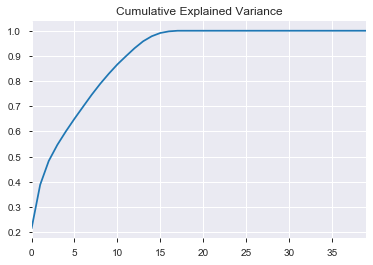

In [12]:
#Plotting cumulative sum
pd.Series(pc.explained_variance_ratio_.cumsum()).plot().set(title='Cumulative Explained Variance');

In [91]:
cum_var = np.round(pc.explained_variance_ratio_.cumsum()*100,2)

In [92]:
cum_var

array([ 21.49,  38.81,  48.29,  54.67,  60.05,  65.07,  69.84,  74.56,
        78.95,  82.95,  86.65,  89.91,  93.07,  95.83,  97.82,  99.12,
        99.76, 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ])

In [93]:
pd.DataFrame({'Eigen_Values': eigen_values, 'VAR': var, 
                  'Cumm_VAR': cum_var}, index = range(1, 41))

Eigen_Values   VAR  Cumm_VAR
1           5.37  0.21     21.49
2           4.33  0.17     38.81
3           2.37  0.09     48.29
4           1.59  0.06     54.67
5           1.35  0.05     60.05
6           1.25  0.05     65.07
7           1.19  0.05     69.84
8           1.18  0.05     74.56
9           1.10  0.04     78.95
10          1.00  0.04     82.95
11          0.93  0.04     86.65
12          0.81  0.03     89.91
13          0.79  0.03     93.07
14          0.69  0.03     95.83
15          0.50  0.02     97.82
16          0.32  0.01     99.12
17          0.16  0.01     99.76
18          0.06  0.00    100.00
19          0.00  0.00    100.00
20          0.00  0.00    100.00
21          0.00  0.00    100.00
22          0.00  0.00    100.00
23          0.00  0.00    100.00
24          0.00  0.00    100.00
25          0.00  0.00    100.00
26          0.00  0.00    100.00
27          0.00  0.00    100.00
28          0.00  0.00    100.00
29          0.00  0.00    100.00
30          0.00  0.00    100.00
31          0.00  0.00    100.00
32          0.00  0.00    100.00
33          0.00  0.00    100.00
34          0.00  0.00    100.00
35          0.00  0.00    100.00
36          0.00  0.00    100.00
37          0.00  0.00    100.00
38          0.00  0.00    100.00
39          0.00  0.00    100.00
40          0.00  0.00    100.00

In [ ]:
#Number of components have choosen as 8 based on cumulative variance is explaining ~ 75 %

In [94]:
pc_final = PCA(n_components = 8).fit(telco_scaled)

In [95]:
pc_final.explained_variance_

array([5.37209024, 4.33296249, 2.36903143, 1.59423141, 1.34749481,
       1.25335901, 1.19282817, 1.18170788])

In [96]:
telco_scaled.shape

(7043, 40)

In [97]:
reduced_cr = pc_final.fit_transform(telco_scaled)  # the out put is Factors (F1, F2, ...F9)

In [98]:
dimensions = pd.DataFrame( reduced_cr, columns = ["C1", "C2", "C3", "C4", "C5", "C6","C7","C8"] )

In [99]:
dimensions.shape

(7043, 8)

In [100]:
#Final Variables after pca
dimensions.head(2)

C1        C2        C3        C4        C5        C6        C7  \
0 -2.476244 -1.283795  1.716973 -1.202582 -1.203002  0.707837 -1.914695   
1 -1.235291  1.099362  2.442163  0.987165  0.554127 -0.779254  0.852935   

         C8  
0 -0.648928  
1  2.880476

### Creating different clusters

In [101]:
km_2 = KMeans(n_clusters = 2, random_state = 42).fit(dimensions)
km_3 = KMeans(n_clusters = 3, random_state = 42).fit(dimensions)
km_4 = KMeans( n_clusters = 4, random_state = 42).fit( dimensions )
km_5 = KMeans( n_clusters = 5, random_state = 42).fit( dimensions )
km_6 = KMeans( n_clusters = 6, random_state = 42).fit( dimensions )
km_7 = KMeans( n_clusters = 7, random_state = 42).fit( dimensions )
km_8 = KMeans( n_clusters = 8, random_state = 42).fit( dimensions )

In [186]:
km_3.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [67]:
data_final_cust.head(2)

customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0       1           29.85         29.85   
1  5575-GNVDE              0      34           56.95       1889.50   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 1   
1            1            0               0                 1   

   PaperlessBilling_Yes  ...  StreamingMovies_No  \
0                     1  ...                   1   
1                     0  ...                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   

   PaymentMethod_Mailed check  
0                           0  
1                           0  

[2 rows x 42 columns]

In [119]:
# save the cluster labels and sort by cluster
data_final_cust['cluster_2'] = km_2.labels_
data_final_cust['cluster_3'] = km_3.labels_
data_final_cust['cluster_4'] = km_4.labels_
data_final_cust['cluster_5'] = km_5.labels_
data_final_cust['cluster_6'] = km_6.labels_
data_final_cust['cluster_7'] = km_7.labels_
data_final_cust['cluster_8'] = km_8.labels_

In [189]:
data_final_cust.head(2)

customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0       1           29.85         29.85   
1  5575-GNVDE              0      34           56.95       1889.50   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 1   
1            1            0               0                 1   

   PaperlessBilling_Yes  ...  PaymentMethod_Credit card (automatic)  \
0                     1  ...                                      0   
1                     0  ...                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  cluster_2  \
0                               1                           0          0   
1                               0                           0          0   

   cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  
0          1          0          4          3          3          4  
1          1          0          4          3          6          0  

[2 rows x 49 columns]

### Choosing number clusters using Silhouette Coefficient

In [79]:
from sklearn.metrics import silhouette_score
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

In [191]:
# calculate SC for K=3
silhouette_score(X=dimensions, labels= km_3.labels_)

0.2867104406102884

In [ ]:
# Calculating SC for clusters of 2-10

In [102]:
sc_scores=[]
for i in range(2,11):
    km_i = KMeans(n_clusters = i, random_state = 42).fit(dimensions)
    labels = km_i.labels_
    sc = silhouette_score(dimensions,labels)
    sc_scores.append(sc)

[Text(0.5, 1.0, 'silhouette scores')]

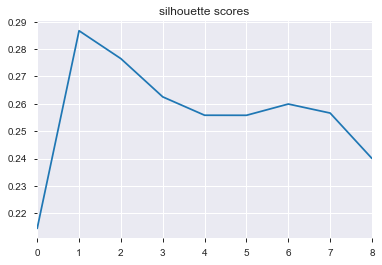

In [103]:
pd.Series(sc_scores).plot().set(title='silhouette scores')


In [ ]:
# from the graph,we see that silhouette scores are highest for n=2 and then n=6,
#we could chose n=2(minimum) or n=6
#Also, Silhouette scores are very low (closer to 0) which means that clusters overlap and it is 
#difficult to differentiate the data into different clusters

### Elbow Analysis

In [104]:
cluster_range = range(2, 11)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(dimensions)
    cluster_errors.append( clusters.inertia_ )

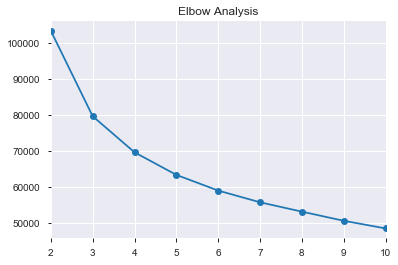

In [108]:
pd.Series(cluster_errors,index=range(2,11)).plot(marker='o').set(title='Elbow Analysis')

In [ ]:
# Based on the figure, we see the gain in explained variance reduces significantly from n=2 to n=4
#n=5. n=4 or 5 looks like the elbow point. 

In [153]:
from scikitplot.metrics import plot_silhouette

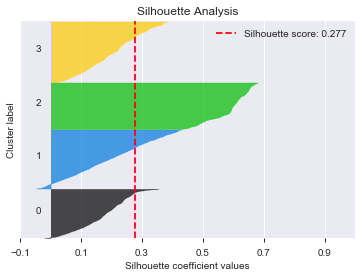

In [151]:
plot_silhouette(dimensions, km_4.labels_);

### Lets pick n=4

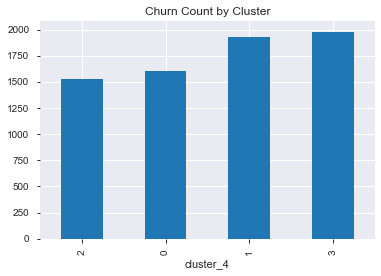

In [121]:
data_final_cust.groupby('cluster_4')['Churn_Yes'].count().sort_values().plot(kind='bar').set(title='Churn Count by Cluster');

In [ ]:
#Thus customers with labels assigned 3 & 1 are most likely to Churn

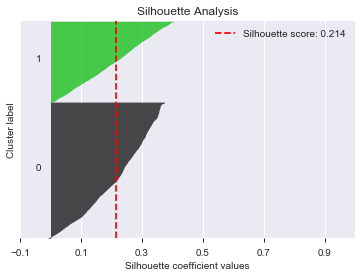

In [152]:
#Lets pick n = 2
plot_silhouette(dimensions, km_2.labels_);

[Text(0.5, 1.0, 'Churn Count by Cluster')]

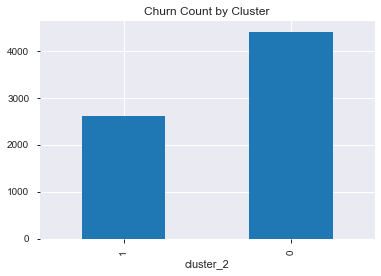

In [122]:
#n=2
data_final_cust.groupby('cluster_2')['Churn_Yes'].count().sort_values().plot(kind='bar').set(title='Churn Count by Cluster')

In [ ]:
#Customers assigned label 0 are more likely to churn

In [198]:
data_final_cust.to_csv('final_labels')

In [199]:
#analyzing average churn rate by cluster n= 4
data_final_cust.groupby('cluster_4').apply(lambda x:x.mean())

SeniorCitizen     tenure  MonthlyCharges  TotalCharges  \
cluster_4                                                           
0                    0.0  21.648817       51.306600   1150.885554   
1                    0.0  56.668912       91.226503   5191.341658   
2                    0.0  30.547182       21.079194    662.604784   
3                    0.0  18.796567       83.535689   1603.948612   

           gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
cluster_4                                                               
0             0.517435     0.366750        0.283935               1.0   
1             0.494819     0.706736        0.372539               1.0   
2             0.510485     0.483617        0.421363               1.0   
3             0.499748     0.358910        0.147400               1.0   

           PaperlessBilling_Yes  Churn_Yes  ...  \
cluster_4                                   ...   
0                      0.531133   0.242839  ...   
1                      0.673575   0.138860  ...   
2                      0.292267   0.074050  ...   
3                      0.793539   0.554266  ...   

           PaymentMethod_Credit card (automatic)  \
cluster_4                                          
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   

           PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
cluster_4                                                               
0                                0.295766                         0.0   
1                                0.262176                         0.0   
2                                0.079948                         0.0   
3                                0.637052                         0.0   

           cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  \
cluster_4                                                                     
0           0.064134   0.849938        0.0   3.132628   3.103985   4.178705   
1           0.999482   0.000000        1.0   1.716062   4.237306   4.233679   
2           0.000000   2.000000        2.0   2.000000   2.000000   2.000000   
3           0.298334   0.866229        3.0   1.228168   0.492680   0.590611   

           cluster_8  
cluster_4             
0           2.473225  
1           4.546114  
2           1.000000  
3           4.852600  

[4 rows x 48 columns]

In [ ]:
#The average churn rate for cluster label 3 is greater than 50%. Thus cluster_4 variable could be a 
# useful feature in classification analysis

In [200]:
data_final_cust.groupby('cluster_2').apply(lambda x:x.mean())

SeniorCitizen     tenure  MonthlyCharges  TotalCharges  \
cluster_2                                                           
0                    0.0  21.674434       49.309072    921.963032   
1                    0.0  50.396111       90.800801   4567.705719   

           gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
cluster_2                                                               
0             0.505430     0.378959        0.283032               1.0   
1             0.503622     0.658406        0.327488               1.0   

           PaperlessBilling_Yes  Churn_Yes  ...  \
cluster_2                                   ...   
0                      0.521719   0.296154  ...   
1                      0.711018   0.213496  ...   

           PaymentMethod_Credit card (automatic)  \
cluster_2                                          
0                                            0.0   
1                                            0.0   

           PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
cluster_2                                                               
0                                0.331674                         0.0   
1                                0.342737                         0.0   

           cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  \
cluster_2                                                                     
0                0.0   1.310633   1.634163   2.145249   1.805882   2.206109   
1                1.0   0.129623   1.411361   1.656881   3.510865   3.565764   

           cluster_8  
cluster_2             
0           3.019231  
1           4.018300  

[2 rows x 48 columns]

In [46]:
check = df['cluster_2'] - df['Churn_Yes'] 

In [49]:
check.value_counts(normalize=True)

 0    0.521227
 1    0.292915
-1    0.185858
dtype: float64

### Part 2 : Classification (Churn or Not)
The approach involves building a baseline model with xgboost and then building a set of models
using logistic regression, decision and random forest for comparison.
We then choose the model with the best scores (explained below)

In [ ]:
#Now that we have segmented the customers into different clusters of n=2 and n=4, we can drop other 
#clusters from our overall dataset. 

In [5]:
df = pd.read_csv('final_labels')

In [6]:
df.head(2)

Unnamed: 0  customerID  SeniorCitizen  tenure  MonthlyCharges  \
0           0  7590-VHVEG              0       1           29.85   
1           1  5575-GNVDE              0      34           56.95   

   TotalCharges  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         29.85            0            1               0                 1   
1       1889.50            1            0               0                 1   

   ...  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0  ...                                      0                               1   
1  ...                                      0                               0   

   PaymentMethod_Mailed check  cluster_2  cluster_3  cluster_4  cluster_5  \
0                           0          0          1          0          4   
1                           0          0          1          0          4   

   cluster_6  cluster_7  cluster_8  
0          3          3          4  
1          3          6          0  

[2 rows x 50 columns]

In [7]:
#We have n=2 & n=4 from clustering analysis so we keep cluster_4 and cluster_2 and drop all others for further analysis
df.drop(columns=['Unnamed: 0','cluster_3','cluster_5','cluster_6','cluster_7','cluster_8'],inplace=True)

In [8]:
df.set_index('customerID',inplace=True)

In [9]:
df.shape

(7043, 43)

### Feature Selection 
Approach: Features dropped progressively based on:
- Correlation Matrix: Features with correlation less than 0.1 with the target variable were dropped
- Use of wrapper algorithms (Logistic Regression, Random Forest, Decision Trees)
- Dropped features with minimal feature importances


In [10]:
X=df.drop(columns='Churn_Yes')
y = df['Churn_Yes']

In [11]:
X.shape

(7043, 42)

Coefficients with low correlation:
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
gender_Male                               -0.008612
MultipleLines_No                          -0.032569
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
InternetService_DSL 
MultipleLines_No phone service                  NaN
InternetService_No                              NaN
OnlineSecurity_No internet service              NaN
OnlineBackup_No internet service                NaN
DeviceProtection_No internet service            NaN
TechSupport_No internet service                 NaN
StreamingTV_No internet service                 NaN
StreamingMovies_No internet service             NaN

In [12]:
#Based on Correlation matrix and intuition, we could drop variables with very low correlations
X_fe = X.drop(columns=['StreamingTV_Yes','StreamingMovies_Yes','MultipleLines_Yes','gender_Male','MultipleLines_No','DeviceProtection_Yes',
         'MultipleLines_No','OnlineBackup_Yes','InternetService_DSL','MultipleLines_No phone service',
             'InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service',
                'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service',
                      'StreamingMovies_No internet service'])

In [13]:
X_fe.shape

(7043, 26)

### Imports for ML

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report

In [17]:
y.value_counts(normalize=True)
#This looks like an imbalanced dataset

0    0.73463
1    0.26537
Name: Churn_Yes, dtype: float64

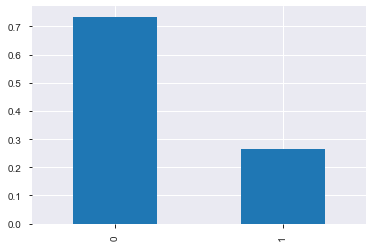

In [19]:
#Average Churn Rate
y.value_counts(normalize=True).plot(kind='bar')

In [ ]:
#Implies the rate of churn is approx. 26%.

In [15]:
#Splitting dataset into train, test and val
X_train_full, X_test, y_train_full, y_test = train_test_split(X_fe, y, test_size=0.20, random_state=142, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=142)

In [14]:
X_train.shape

(4225, 26)

In [14]:
y_train.value_counts(normalize=True)

0    0.732781
1    0.267219
Name: Churn_Yes, dtype: float64

In [64]:
X_val.shape

(1409, 26)

In [65]:
X_test.shape

(1409, 26)

### Baseline Model

In [17]:
from xgboost import XGBClassifier

In [18]:
xgb = XGBClassifier(max_depth=5 , random_state=42)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb.score(X_test, y_test)

0.794180269694819

In [19]:
cross_val_score(xgb,X_fe,y,cv=5,scoring='f1').mean()

0.5640297389092082

### Model 1: Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
#Creating a pipeline object to perform scaling, oversampling in one step
pipe_log = Pipeline([
    ('scaling', StandardScaler()),
    ('oversampler', RandomOverSampler(random_state=42)),
    ('logreg', LogisticRegression(random_state=42))
     ])
#params = {'logreg__C': [0.0001,0.001,0.01,0.1,1], 'logreg__penalty':['l1', 'l2'] } 

In [18]:
pipe_log.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('oversampler', RandomOverSampler(random_state=42)),
                ('logreg', LogisticRegression(random_state=42))])

In [19]:
y_pred_val_log = pipe_log.predict(X_val)
y_proba_val_log = pipe_log.predict_proba(X_val)[:,1]

In [20]:
print(classification_report(y_val,y_pred_val_log))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1043
           1       0.50      0.80      0.61       366

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



Recall Score implies that out of all the actual customers who churn, how many did we get right.

80% recall score from our model is decent. 

Precision Score implies that out of all cases that were predicted positive (positive guesses) , how many did we get right.

50% precision score is a bit low. Implies our model is accurate only 50% of the time.

f1 (harmonic average of precision and recall) = 63%

In [28]:
f1_log = cross_val_score(pipe_log,X_fe,y,cv=5,scoring='f1').mean()
f1_log

0.6277973759824982

In [29]:
roc_log = roc_auc_score(y_val,y_proba_val_log)
roc_log

0.837395019620787

In [21]:
#Feature Importances
pd.Series(pipe_log.named_steps['logreg'].coef_[0],index=X_fe.columns).sort_values(ascending=False)

TotalCharges                               0.679608
Contract_Month-to-month                    0.487321
TechSupport_No                             0.486912
OnlineSecurity_No                          0.475604
InternetService_Fiber optic                0.417018
OnlineSecurity_Yes                         0.263201
TechSupport_Yes                            0.248721
PaperlessBilling_Yes                       0.166586
PaymentMethod_Electronic check             0.160596
cluster_2                                  0.130808
OnlineBackup_No                            0.080149
DeviceProtection_No                        0.059142
cluster_4                                  0.028357
Partner_Yes                                0.022089
Contract_One year                          0.000000
Contract_Two year                          0.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Credit card (automatic)      0.000000
PhoneService_Yes                           0.000000
PaymentMetho

#### Features with 0 feature importance
PhoneService_Yes                           
SeniorCitizen                              
PaymentMethod_Mailed check                 
Contract_One year                          
Contract_Two year                         
PaymentMethod_Bank transfer (automatic)    
PaymentMethod_Credit card (automatic)      

In [ ]:
#According to this model cluster_2 seems to be a reasonable predictor of churn

### Model 2: Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
random = RandomForestClassifier()

In [24]:
pipe_rand = Pipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('random', RandomForestClassifier(random_state=42))
     ])

In [25]:
pipe_rand.fit(X_train,y_train)

Pipeline(steps=[('oversampler', RandomOverSampler(random_state=42)),
                ('random', RandomForestClassifier(random_state=42))])

In [30]:
y_pred_val_rand = pipe_rand.predict(X_val)
y_proba_val_rand = pipe_rand.predict_proba(X_val)[:,1]

In [27]:
print(classification_report(y_val,y_pred_val_rand))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1043
           1       0.57      0.57      0.57       366

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [31]:
f1_rand = cross_val_score(pipe_rand,X_fe,y,cv=5,scoring='f1').mean()
f1_rand

0.5736422454384569

In [44]:
roc_rand = roc_auc_score(y_val,y_proba_val_rand)
roc_rand

0.8077228360812913

In [32]:
pd.Series(pipe_rand.named_steps['random'].feature_importances_,index=X_fe.columns).sort_values(ascending=False)

MonthlyCharges                             0.187222
TotalCharges                               0.182907
tenure                                     0.156118
Contract_Month-to-month                    0.088892
cluster_4                                  0.052512
TechSupport_No                             0.048875
OnlineSecurity_No                          0.041627
PaymentMethod_Electronic check             0.030446
OnlineBackup_No                            0.029204
PaperlessBilling_Yes                       0.026414
InternetService_Fiber optic                0.025838
Partner_Yes                                0.022446
DeviceProtection_No                        0.021851
Dependents_Yes                             0.021402
StreamingTV_No                             0.017956
StreamingMovies_No                         0.016560
TechSupport_Yes                            0.011017
OnlineSecurity_Yes                         0.009943
cluster_2                                  0.008769
Contract_One

#### Features with very low or 0 correlation
OnlineSecurity_Yes                         
TechSupport_Yes                            
PaymentMethod_Mailed check                 
PhoneService_Yes                           
Contract_One year                          
Contract_Two year                          
PaymentMethod_Bank transfer (automatic)    
PaymentMethod_Credit card (automatic)      
SeniorCitizen                                                       

### Model 3: Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
X_train.shape

(4225, 26)

In [35]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

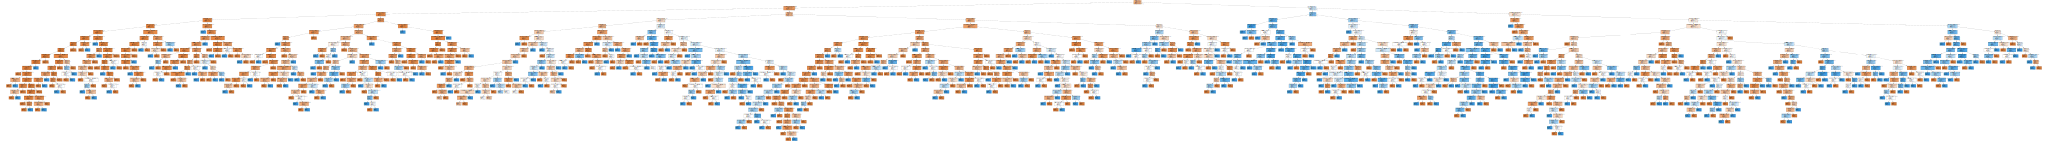

In [42]:
#Visualizing Decision Tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(d_tree, out_file=None, feature_names=X_fe.columns,  
                           filled=True, special_characters=True)  

graphviz.Source(dot_data)

In [ ]:
#Tree based methods do not require feature scaling

In [36]:
pipe_tree = Pipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('dtree', DecisionTreeClassifier(random_state=42))
     ])

In [37]:
pipe_tree.fit(X_train,y_train)

Pipeline(steps=[('oversampler', RandomOverSampler(random_state=42)),
                ('dtree', DecisionTreeClassifier(random_state=42))])

In [38]:
y_pred_val_tree = pipe_tree.predict(X_val)
y_proba_val_tree = pipe_tree.predict_proba(X_val)[:,1]

In [39]:
print(classification_report(y_val,y_pred_val_tree))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1043
           1       0.51      0.52      0.51       366

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409



In [40]:
f1_tree = cross_val_score(pipe_tree,X_fe,y,cv=5,scoring='f1').mean()
f1_tree

0.49317362438489454

In [41]:
roc_tree = roc_auc_score(y_val,y_proba_val_tree)
roc_tree

0.671294186064788

In [42]:
pd.Series(pipe_tree.named_steps['dtree'].feature_importances_,index=X_fe.columns).sort_values(ascending=False)

MonthlyCharges                             0.234752
Contract_Month-to-month                    0.228198
TotalCharges                               0.211158
tenure                                     0.105047
cluster_4                                  0.051769
OnlineSecurity_No                          0.022756
PaperlessBilling_Yes                       0.022540
Partner_Yes                                0.020430
OnlineBackup_No                            0.018237
PaymentMethod_Electronic check             0.018099
DeviceProtection_No                        0.015858
Dependents_Yes                             0.015762
StreamingMovies_No                         0.009130
TechSupport_Yes                            0.008940
TechSupport_No                             0.006665
StreamingTV_No                             0.004939
OnlineSecurity_Yes                         0.003433
cluster_2                                  0.001358
InternetService_Fiber optic                0.000929
Contract_One

#### Features with 0 or very low feature important
OnlineSecurity_Yes                         
TechSupport_No                             
InternetService_Fiber optic                
PaymentMethod_Mailed check                 
PhoneService_Yes                           
Contract_One year                         
Contract_Two year                          
PaymentMethod_Bank transfer (automatic)    
PaymentMethod_Credit card (automatic)      
SeniorCitizen                              

In [ ]:
#Based on feature importances from the above algorithms we can drop a number of features

### Summary of ROC Scores

In [45]:
print('roc_auc score of Random Forest :',roc_rand)
print('roc_auc score of Logistic Regression :',roc_log)
print('roc_auc score of Decision Tree :',roc_tree)

roc_auc score of Random Forest : 0.8077228360812913
roc_auc score of Logistic Regression : 0.837395019620787
roc_auc score of Decision Tree : 0.671294186064788


### Summary of f1 Scores

In [46]:
print('f1 score of Random Forest :',f1_rand)
print('f1 score of Logistic Regression :',f1_log)
print('f1 score of Decision Tree :',f1_tree)

f1 score of Random Forest : 0.5736422454384569
f1 score of Logistic Regression : 0.6277973759824982
f1 score of Decision Tree : 0.49317362438489454


In [ ]:
#Based on these scores, Logistic Regression returns the best results

### Final Model with Validation : Logistic Regression

In [ ]:
#Based on above algorithms, we drop variables with lowest feature importances

In [ ]:
OnlineSecurity_Yes                         0.006659
TechSupport_No                             0.006340
InternetService_Fiber optic                0.001899
PaymentMethod_Mailed check                 0.000000
PhoneService_Yes                           0.000000
Contract_One year                          0.000000
Contract_Two year                          0.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Credit card (automatic)      0.000000
SeniorCitizen   

OnlineSecurity_Yes                         0.009725
TechSupport_Yes                            0.009431
PaymentMethod_Mailed check                 0.000000
PhoneService_Yes                           0.000000
Contract_One year                          0.000000
Contract_Two year                          0.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Credit card (automatic)      0.000000
SeniorCitizen                              0.000000 

PhoneService_Yes                           0.000000
SeniorCitizen                              0.000000
PaymentMethod_Mailed check                 0.000000
Contract_One year                          0.000000
Contract_Two year                          0.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Credit card (automatic)      0.000000

In [52]:
X_fe.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'cluster_4'],
      dtype='object')

In [47]:
X_fe.drop(columns=['OnlineSecurity_Yes','PaymentMethod_Mailed check','PhoneService_Yes',
              'Contract_One year','Contract_Two year','OnlineSecurity_Yes',
                  'SeniorCitizen','TechSupport_No','PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)','SeniorCitizen'],inplace=True)

In [49]:
X_fe.shape

(7043, 17)

In [48]:
#Analyzing correlations for further feature engineering
X_fe.corr()

tenure  MonthlyCharges  TotalCharges  \
tenure                          1.000000        0.247900      0.826178   
MonthlyCharges                  0.247900        1.000000      0.651174   
TotalCharges                    0.826178        0.651174      1.000000   
Partner_Yes                     0.379697        0.096848      0.317504   
Dependents_Yes                  0.159712       -0.113890      0.062078   
PaperlessBilling_Yes            0.006152        0.352150      0.158574   
InternetService_Fiber optic     0.019720        0.787066      0.361655   
OnlineSecurity_No              -0.263746        0.360898     -0.063137   
OnlineBackup_No                -0.312694        0.210753     -0.176276   
DeviceProtection_No            -0.312740        0.171836     -0.188108   
TechSupport_Yes                 0.324221        0.338304      0.431883   
StreamingTV_No                 -0.245039        0.016951     -0.195884   
StreamingMovies_No             -0.252220        0.018075     -0.202188   
Contract_Month-to-month        -0.645561        0.060165     -0.444255   
PaymentMethod_Electronic check -0.208363        0.271625     -0.059246   
cluster_2                       0.565424        0.666687      0.777602   
cluster_4                      -0.202180        0.123021     -0.185519   

                                Partner_Yes  Dependents_Yes  \
tenure                             0.379697        0.159712   
MonthlyCharges                     0.096848       -0.113890   
TotalCharges                       0.317504        0.062078   
Partner_Yes                        1.000000        0.452676   
Dependents_Yes                     0.452676        1.000000   
PaperlessBilling_Yes              -0.014877       -0.111377   
InternetService_Fiber optic        0.000304       -0.165818   
OnlineSecurity_No                 -0.129936       -0.188434   
OnlineBackup_No                   -0.136058       -0.138756   
DeviceProtection_No               -0.147692       -0.129415   
TechSupport_Yes                    0.119999        0.063268   
StreamingTV_No                    -0.124357       -0.101176   
StreamingMovies_No                -0.117529       -0.078198   
Contract_Month-to-month           -0.280865       -0.231720   
PaymentMethod_Electronic check    -0.083852       -0.150642   
cluster_2                          0.270354        0.046918   
cluster_4                         -0.076802       -0.107989   

                                PaperlessBilling_Yes  \
tenure                                      0.006152   
MonthlyCharges                              0.352150   
TotalCharges                                0.158574   
Partner_Yes                                -0.014877   
Dependents_Yes                             -0.111377   
PaperlessBilling_Yes                        1.000000   
InternetService_Fiber optic                 0.326853   
OnlineSecurity_No                           0.267793   
OnlineBackup_No                             0.145120   
DeviceProtection_No                         0.167121   
TechSupport_Yes                             0.037880   
StreamingTV_No                              0.047712   
StreamingMovies_No                          0.059488   
Contract_Month-to-month                     0.169096   
PaymentMethod_Electronic check              0.208865   
cluster_2                                   0.186228   
cluster_4                                   0.112474   

                                InternetService_Fiber optic  \
tenure                                             0.019720   
MonthlyCharges                                     0.787066   
TotalCharges                                       0.361655   
Partner_Yes                                        0.000304   
Dependents_Yes                                    -0.165818   
PaperlessBilling_Yes                               0.326853   
InternetService_Fiber optic                        1.000000   
OnlineSecurity_No                                  0.

In [ ]:
#tenure is highly correlated Total Charges. We drop Total Charges because tenure has higher correlation
#with Churn (see correlation matrix)

#Monthly Charges is highly correlated with Total Charges

#InternetService_Fiber optic is highly correlated with Monthly Charges. But InternetService_Fiber optic
# also has higher correlation with Churn so we keep it



In [ ]:
#Also removing variables with feature importance less than 0.1

In [50]:
X_fe.drop(columns=['StreamingTV_No','Partner_Yes','Dependents_Yes',
                  'StreamingMovies_No','DeviceProtection_No'],inplace=True)

In [51]:
X_fe.shape

(7043, 12)

In [52]:
X_fe.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'TechSupport_Yes', 'Contract_Month-to-month',
       'PaymentMethod_Electronic check', 'cluster_2', 'cluster_4'],
      dtype='object')

In [53]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_fe, y, test_size=0.20, random_state=142, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=142)

In [54]:
pipe_final = Pipeline([
    ('scaling', StandardScaler()),
    ('oversampler', RandomOverSampler(random_state=42)),
    ('logreg', LogisticRegression(random_state=42))
     ])
params = {'logreg__C': [0.001,0.01,0.1,1,10,100], 'logreg__penalty':['l1', 'l2'] }

In [56]:
grid_final = GridSearchCV(estimator=pipe_final, 
                    param_grid=params, 
                    cv=5,
                    refit=True,
                   verbose= -1,
                   n_jobs=-1)

In [57]:
grid_final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('oversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']},
             verbose=-1)

In [58]:
grid_final.best_params_

{'logreg__C': 0.001, 'logreg__penalty': 'l2'}

In [59]:
best_model = grid_final.best_estimator_

In [60]:
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:,1]

In [61]:
roc_auc_score(y_val,y_proba)

0.8343340196679399

In [62]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1043
           1       0.50      0.80      0.62       366

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.76      1409



In [40]:
X_train_full.shape

(5634, 12)

### Final Fitting and Predicting on test Set

In [63]:
best_model.fit(X_train_full,y_train_full)

Pipeline(steps=[('scaling', StandardScaler()),
                ('oversampler', RandomOverSampler(random_state=42)),
                ('logreg', LogisticRegression(C=0.001, random_state=42))])

In [64]:
y_pred_final = best_model.predict(X_test)
y_proba_final = best_model.predict_proba(X_test)[:,1]

In [65]:
y_proba_final

array([0.12793311, 0.15727641, 0.81168298, ..., 0.41398142, 0.16685632,
       0.3625025 ])

In [66]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [ ]:
#f1_final = 62%

In [36]:
roc_final = roc_auc_score(y_test,y_proba_final)
roc_final

0.8396432354232866

### Final Features/Top Predictors of Churn

In [67]:
final_features = pd.Series(best_model.named_steps['logreg'].coef_[0],index=X_fe.columns).sort_values(ascending=False)
final_features

Contract_Month-to-month           0.340045
InternetService_Fiber optic       0.234623
OnlineSecurity_No                 0.218345
PaymentMethod_Electronic check    0.197298
MonthlyCharges                    0.186682
PaperlessBilling_Yes              0.136574
OnlineBackup_No                   0.133750
cluster_4                         0.077182
cluster_2                         0.011545
TechSupport_Yes                  -0.106387
TotalCharges                     -0.110636
tenure                           -0.314480
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

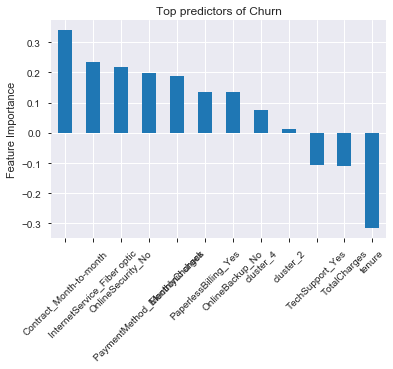

In [68]:
final_features.plot(kind='bar')
plt.title('Top predictors of Churn')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45)

In [45]:
import plotly.offline as py
import plotly.graph_objs as go 

py.init_notebook_mode(connected=True)

In [48]:
data = go.Bar(
    x=final_features.index,
    y=final_features.values,
) 

layout = go.Layout(title='Top Predictors of Churn')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### Insights

In [ ]:
#if total charges are high, more likely to churn. 
#Month to Month contract is a strong predictor.
# Tenure is the strongest predictor. Higher the tenure, less likely the customer will churn.

### Model Interpretation and application: Using Lime and Decile Analysis

### 1.  Decile Analysis
##### Useful for business validation. Helps in categorizing the new set(in this case test ) into 10 groups based on probability of churning

In [ ]:
#We create a dataframe of probability of churn obtained from our final model, that is, y_proba_final

In [69]:
y_predicted = pd.DataFrame(y_proba_final,index=y_test.index)
y_predicted.columns = ['prob']
y_predicted

prob
customerID          
6024-RUGGH  0.127933
3654-ARMGP  0.157276
2057-ZBLPD  0.811683
9172-JITSM  0.801681
4396-KLSEH  0.525597
...              ...
0932-YIXYU  0.133369
1177-XZBJL  0.104839
2108-XWMPY  0.413981
6754-WKSHP  0.166856
8740-XLHDR  0.362502

[1409 rows x 1 columns]

In [70]:
#Actual Labels
y_test

customerID
6024-RUGGH    0
3654-ARMGP    0
2057-ZBLPD    1
9172-JITSM    1
4396-KLSEH    0
             ..
0932-YIXYU    0
1177-XZBJL    0
2108-XWMPY    1
6754-WKSHP    0
8740-XLHDR    1
Name: Churn_Yes, Length: 1409, dtype: int64

In [71]:
#Creating a combined dataframe of actual labels and probability
test_pf = pd.concat([y_test, y_predicted], axis = 1)
test_pf.columns = ['actual','prob']
test_pf

actual      prob
customerID                  
6024-RUGGH       0  0.127933
3654-ARMGP       0  0.157276
2057-ZBLPD       1  0.811683
9172-JITSM       1  0.801681
4396-KLSEH       0  0.525597
...            ...       ...
0932-YIXYU       0  0.133369
1177-XZBJL       0  0.104839
2108-XWMPY       1  0.413981
6754-WKSHP       0  0.166856
8740-XLHDR       1  0.362502

[1409 rows x 2 columns]

In [ ]:
#Creating deciles based on probability 

In [72]:
test_pf['Deciles'] = pd.qcut(test_pf['prob'], 10, labels = False)
test_pf.head()

actual      prob  Deciles
customerID                           
6024-RUGGH       0  0.127933        0
3654-ARMGP       0  0.157276        1
2057-ZBLPD       1  0.811683        9
9172-JITSM       1  0.801681        9
4396-KLSEH       0  0.525597        6

In [112]:
#Calculating no. of 1s (churns) per decile
test_pf.groupby('Deciles')['actual'].sum()

Deciles
0      1
1      6
2      8
3     13
4     26
5     27
6     46
7     63
8     80
9    104
Name: actual, dtype: int64

In [73]:
#Similarly, calculating total count , maximum prob and minimum prob per decile
no_1s = test_pf[['Deciles','actual']].groupby(test_pf.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_pf[['Deciles','actual']].groupby(test_pf.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_pf[['Deciles','prob']].groupby(test_pf.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_pf[['Deciles','prob']].groupby(test_pf.Deciles).min().sort_index(ascending=False)['prob']

In [74]:
avg_prob = test_pf.groupby('Deciles')['prob'].mean().sort_index(ascending=False)
Avg_Churn= pd.DataFrame(avg_prob).rename(columns={'prob':'Avg_Prob_Churn'})

In [75]:
# Creating dataframe for decile analysis. No. of 0s is obtained by subtracting 1s from total count per decile
Decile_analysis_test = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total,Avg_Churn], axis=1)
Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total','Avg_Churn']

In [76]:
Decile_analysis_test

Min_prob  Max_prob   #1   #0  Total  Avg_Churn
Deciles                                                
9        0.784595  0.871208  104   37    141   0.824357
8        0.712893  0.784163   80   61    141   0.754334
7        0.617719  0.712595   63   78    141   0.667182
6        0.520400  0.617212   46   95    141   0.570094
5        0.416699  0.519823   27  113    140   0.467763
4        0.333205  0.416328   26  115    141   0.371192
3        0.235640  0.331775   13  128    141   0.282628
2        0.176936  0.232730    8  133    141   0.202220
1        0.134247  0.176907    6  135    141   0.156481
0        0.081816  0.134098    1  140    141   0.111118

### Decile analysis Results interpretation
- Top-two deciles (Decile 8 & 9) - High risk customers with an average churn rate of 82% and 75% respectively. Customers in this segment need to be targeted with campaigns
- 5th ,6th,7th deciles - medium risk customers. 
- 4 and below decile onwards - low risk customers. 

In [128]:
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

### Creating Lift Chart

In [78]:
test_pf.head()

actual      prob  Deciles
customerID                           
6024-RUGGH       0  0.127933        0
3654-ARMGP       0  0.157276        1
2057-ZBLPD       1  0.811683        9
9172-JITSM       1  0.801681        9
4396-KLSEH       0  0.525597        6

In [111]:
test_pf.groupby('Deciles')['prob'].mean()

Deciles
0    0.111118
1    0.156481
2    0.202220
3    0.282628
4    0.371192
5    0.467763
6    0.570094
7    0.667182
8    0.754334
9    0.824357
Name: prob, dtype: float64

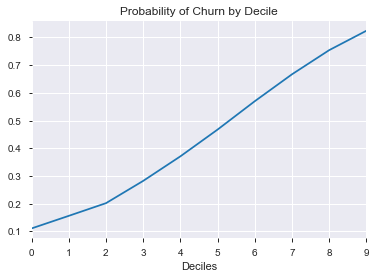

In [80]:
 pd.Series(test_pf.groupby('Deciles')['prob'].mean()).plot().set_title('Probability of Churn by Decile');

### 2. Using Lime for Interpretation
The output of LIME is a list of explanations, reflecting the contribution of each feature to the prediction of a data sample.This provides local interpretability, and it also allows to determine which feature changes will have most impact on the prediction.

In [87]:
X_train.shape

(4225, 12)

In [81]:
from lime.lime_tabular import LimeTabularExplainer

In [82]:
# Set up Lime object, with Feature/Label names
explainer = LimeTabularExplainer(X_train_full.values, feature_names=X_train_full.columns.values, class_names=['Churn_No', 'Churn_Yes'])

In [83]:
X_test.head()

tenure  MonthlyCharges  TotalCharges  PaperlessBilling_Yes  \
customerID                                                               
6024-RUGGH      72           25.20       1798.90                     1   
3654-ARMGP      61           88.65       5321.25                     0   
2057-ZBLPD      21           86.50       1808.70                     1   
9172-JITSM      26           90.80       2361.80                     1   
4396-KLSEH       4           19.85         63.00                     1   

            InternetService_Fiber optic  OnlineSecurity_No  OnlineBackup_No  \
customerID                                                                    
6024-RUGGH                            0                  0                0   
3654-ARMGP                            0                  1                0   
2057-ZBLPD                            1                  1                1   
9172-JITSM                            1                  1                1   
4396-KLSEH                            0                  0                0   

            TechSupport_Yes  Contract_Month-to-month  \
customerID                                             
6024-RUGGH                0                        0   
3654-ARMGP                1                        0   
2057-ZBLPD                0                        1   
9172-JITSM                0                        1   
4396-KLSEH                0                        1   

            PaymentMethod_Electronic check  cluster_2  cluster_4  
customerID                                                        
6024-RUGGH                               0          0          2  
3654-ARMGP                               0          1          1  
2057-ZBLPD                               1          0          3  
9172-JITSM                               1          0          3  
4396-KLSEH                               1          0          2

In [104]:
X_test.tail()

tenure  MonthlyCharges  TotalCharges  PaperlessBilling_Yes  \
customerID                                                               
0932-YIXYU      47           20.25       1029.80                     0   
1177-XZBJL      53           64.15       3491.55                     0   
2108-XWMPY       3           35.45        106.85                     1   
6754-WKSHP      30           25.35        723.30                     0   
8740-XLHDR       5           43.25        219.00                     1   

            InternetService_Fiber optic  OnlineSecurity_No  OnlineBackup_No  \
customerID                                                                    
0932-YIXYU                            0                  0                0   
1177-XZBJL                            0                  0                0   
2108-XWMPY                            0                  0                0   
6754-WKSHP                            0                  0                0   
8740-XLHDR                            0                  0                0   

            TechSupport_Yes  Contract_Month-to-month  \
customerID                                             
0932-YIXYU                0                        0   
1177-XZBJL                1                        0   
2108-XWMPY                0                        1   
6754-WKSHP                0                        0   
8740-XLHDR                1                        1   

            PaymentMethod_Electronic check  
customerID                                  
0932-YIXYU                               0  
1177-XZBJL                               0  
2108-XWMPY                               0  
6754-WKSHP                               0  
8740-XLHDR                               0

### Test Cases

In [84]:
#Customer 1
y_test['4396-KLSEH']

0

In [ ]:
#The customer does not churn

In [85]:
#1 Pick a customer we want to analize
customerID = '4396-KLSEH'

exp = explainer.explain_instance(X_test.loc[customerID], best_model.predict_proba)

# Display explanation
exp.show_in_notebook()

In [94]:
#Implies our model predicts the customer will churn by a small margin (probability just over 50%).
#Decile result informs us that he is a medium risk customer
test_pf.loc['4396-KLSEH']

actual     0.000000
prob       0.525597
Deciles    6.000000
Name: 4396-KLSEH, dtype: float64

In [95]:
#2 Customer 2
y_test['2057-ZBLPD']
#the customer churns

1

In [96]:
#2 Pick a customer we want to analize
customerID = '2057-ZBLPD'

exp = explainer.explain_instance(X_test.loc[customerID], best_model.predict_proba)

# Display explanation
exp.show_in_notebook()

In [97]:
#Implies our model strongly predicts the customer will churn.
#Decile result informs us that he is a risk customer
test_pf.loc['2057-ZBLPD']

actual     1.000000
prob       0.811683
Deciles    9.000000
Name: 2057-ZBLPD, dtype: float64

In [ ]:
# Customer 3

In [98]:
y_test['6754-WKSHP']
#Customer does not Churn

0

In [99]:
#1 Pick a customer we want to analize
customerID = '6754-WKSHP'

exp = explainer.explain_instance(X_test.loc[customerID], best_model.predict_proba)

# Display explanation
exp.show_in_notebook()

In [100]:
#Implies our model strongly predicts the customer will not churn.
#Decile result informs us that he is a low risk customer
test_pf.loc['6754-WKSHP']

actual     0.000000
prob       0.166856
Deciles    1.000000
Name: 6754-WKSHP, dtype: float64

## The End